# Final Project - Logistic Regression

# Imports

In [1]:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [2]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.
    y[y==3] = 0.
    y[y>3] = 1.

    y_0 = (y[y==-1][:np.count_nonzero(y==1)]).reshape((-1, 1))
    y_1 = (y[y==0][:np.count_nonzero(y==1)]).reshape((-1, 1))
    y_2 = (y[y==1]).reshape((-1, 1))

    X_0 = X[y==-1][:np.count_nonzero(y==1)]
    X_1 = X[y==0][:np.count_nonzero(y==1)]
    X_2 = X[y==1]

    y = np.vstack((y_0, y_1, y_2)).reshape((-1, ))
    X = np.vstack((X_0, X_1, X_2))

    print(f'Current y hist: {np.histogram(y, [-1.5, -0.5, 0.5, 1.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Look at the new features after scaling

    # Split the data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [3]:
def confusion_and_classification(y, y_hat, title):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(-1, 2))
    disp.plot(cmap='winter')
    plt.title(title)
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Logistic Regression with Lasso (L1) Regularization

In [4]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg, Yhat_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # Create the Logistic Regression model object as described above and save it to logreg
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    #print(f'Logistic - L1, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    #print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    Yhat_test_logreg.append(Yhat_test)


# Logistic Regression with Ridge (L2) Regularization.

In [5]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2, Yhat_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # Create the Logistic Regression model object as described above and save it to logreg2
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    #print(f'Logistic - L2, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    #print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    Yhat_test_logreg2.append(Yhat_test)
    

In [6]:
def find_best_test(acc_train_logreg, acc_test_logreg, Y_hat_test_logreg, cvals):
    
    max_test = max(acc_test_logreg)
    max_test_ind = acc_test_logreg.index(max_test) 
    train = acc_train_logreg[max_test_ind]
    Y_hat = Y_hat_test_logreg[max_test_ind]
    best_c = cvals[max_test_ind]
    return train, max_test, Y_hat, best_c  


In [7]:
def train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    Yhat_test_logreg = []


    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    # c_logreg = np.geomspace(0.1, 50, num=16)
    for i, c in enumerate(c_logreg):
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg, Yhat_test_logreg)
        if i % 10 == 0:
            print(f'Logistic - L1, C={c}, Train Accuracy = {acc_train_logreg[i]}, Test Accuracy = {acc_test_logreg[i]}')

    train_l1, test_l1, Y_hat_l1, best_c_l1 = find_best_test(acc_train_logreg, acc_test_logreg, Yhat_test_logreg, c_logreg)
    print(f'Best: Logistic - L1, Train Accuracy = {train_l1}, C={best_c_l1}')
    print(f'Test Accuracy = {test_l1}')
    confusion_and_classification(y_test, Y_hat_l1, f'C={best_c_l1}')

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('Accuracy')
    plt.title('L1 - Training and Test Accuracy vs c Parameter')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = [] 
    Yhat_test_logreg2 = []
    # c_logreg2 = c_logreg
    for i, c in enumerate(c_logreg2):
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2, Yhat_test_logreg2)
        if i % 10 == 0:
            print(f'Logistic - L2, C={c}, Train Accuracy = {acc_train_logreg2[i]}, Test Accuracy = {acc_test_logreg2[i]}')

    train_l2, test_l2, Y_hat_l2, best_c_l2 = find_best_test(acc_train_logreg2, acc_test_logreg2, Yhat_test_logreg2, c_logreg2)
    print(f'Best: Logistic - L2, Train Accuracy = {train_l2}, C={best_c_l2}')
    print(f'Test Accuracy = {test_l2}')
    confusion_and_classification(y_test, Y_hat_l2, f'C={best_c_l2}')

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L2 - Training and Test Accuracy vs c Parameter')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [8]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [9]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([217, 217, 217]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[1.2100e+01 4.0000e-01 5.2000e-01 2.0000e+00 9.2000e-02 1.5000e+01
  5.4000e+01 1.0000e+00 3.0300e+00 6.6000e-01 1.0200e+01]
 [1.3300e+01 4.3000e-01 5.8000e-01 1.9000e+00 7.0000e-02 1.5000e+01
  4.0000e+01 1.0004e+00 3.0600e+00 4.9000e-01 9.0000e+00]
 [9.2000e+00 5.6000e-01 1.8000e-01 1.6000e+00 7.8000e-02 1.0000e+01
  2.1000e+01 9.9576e-01 3.1500e+00 4.9000e-01 9.9000e+00]
 [6.4000e+00 5.3000e-01 9.0000e-02 3.9000e+00 1.2300e-01 1.4000e+01
  3.1000e+01 9.9680e-01 3.5000e+00 6.7000e-01 1.1000e+01]
 [9.4000e+00 3.4000e-01 3.7000e-01 2.2000e+00 7.5000e-02 5.0000e+00
  1.3000e+01 9.9800e-01 3.2200e+00 6.2000e-01 9.2000e+00]
 [9.3000e+00 6.5500e-01 2.6000e-01 2.0000e+00 9.6000e-02 5.0000e+

Logistic - L1, C=0.01, Train Accuracy = 0.45384615384615384, Test Accuracy = 0.3816793893129771
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.6576923076923077, Test Accuracy = 0.6564885496183206
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.6480769230769231, Test Accuracy = 0.6564885496183206
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.65, Test Accuracy = 0.648854961832061
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.6480769230769231, Test Accuracy = 0.648854961832061
Best: Logistic - L1, Train Accuracy = 0.6076923076923076, C=0.05061224489795919
Test Accuracy = 0.6717557251908397


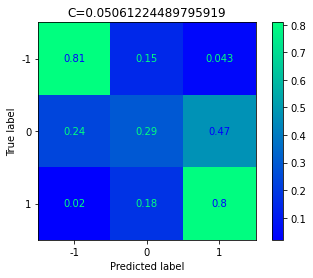

              precision    recall  f1-score   support

        -1.0       0.81      0.81      0.81        47
         0.0       0.38      0.29      0.33        34
         1.0       0.69      0.80      0.74        50
		 R2 Score: 0.4635375649708615



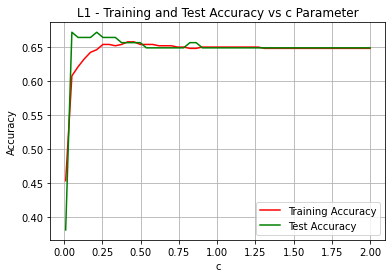

Logistic - L2, C=0.01, Train Accuracy = 0.6211538461538462, Test Accuracy = 0.6564885496183206
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.6384615384615384, Test Accuracy = 0.6412213740458015
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.6423076923076924, Test Accuracy = 0.6412213740458015
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.6403846153846153, Test Accuracy = 0.6412213740458015
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.6384615384615384, Test Accuracy = 0.6412213740458015
Best: Logistic - L2, Train Accuracy = 0.6326923076923077, C=0.05061224489795919
Test Accuracy = 0.6641221374045801


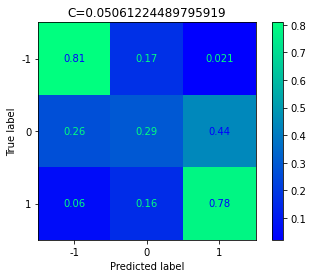

              precision    recall  f1-score   support

        -1.0       0.76      0.81      0.78        47
         0.0       0.38      0.29      0.33        34
         1.0       0.71      0.78      0.74        50
		 R2 Score: 0.4222712238147739



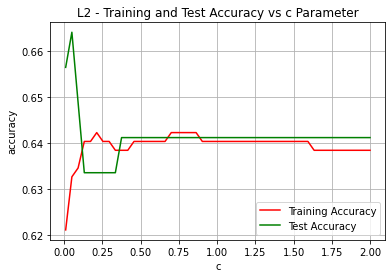

In [10]:
# num_of_different_c = 50
c_logreg = np.linspace(0.01, 2) 
c_logreg2 = np.linspace(0.01, 2) 

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, C=0.01, Train Accuracy = 0.45384615384615384, Test Accuracy = 0.3816793893129771
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.7, Test Accuracy = 0.6564885496183206
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.7365384615384616, Test Accuracy = 0.6717557251908397
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.7423076923076923, Test Accuracy = 0.6717557251908397
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.7442307692307693, Test Accuracy = 0.7099236641221374
Best: Logistic - L1, Train Accuracy = 0.7442307692307693, C=1.6344897959183673
Test Accuracy = 0.7099236641221374


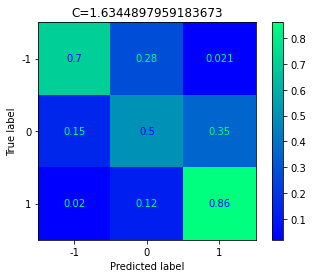

              precision    recall  f1-score   support

        -1.0       0.85      0.70      0.77        47
         0.0       0.47      0.50      0.49        34
         1.0       0.77      0.86      0.81        50
		 R2 Score: 0.5460702472830367



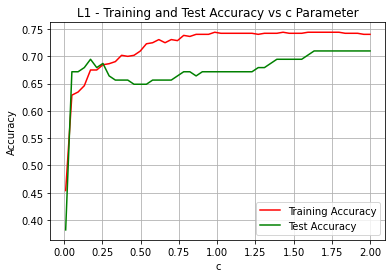

Logistic - L2, C=0.01, Train Accuracy = 0.6923076923076923, Test Accuracy = 0.6335877862595419
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.75, Test Accuracy = 0.6717557251908397
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.7596153846153846, Test Accuracy = 0.6870229007633588
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.7615384615384615, Test Accuracy = 0.6946564885496184
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.7596153846153846, Test Accuracy = 0.6946564885496184
Best: Logistic - L2, Train Accuracy = 0.7615384615384615, C=1.8375510204081633
Test Accuracy = 0.7022900763358778


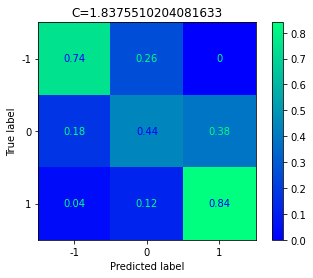

              precision    recall  f1-score   support

        -1.0       0.81      0.74      0.78        47
         0.0       0.45      0.44      0.45        34
         1.0       0.76      0.84      0.80        50
		 R2 Score: 0.5357536619940148



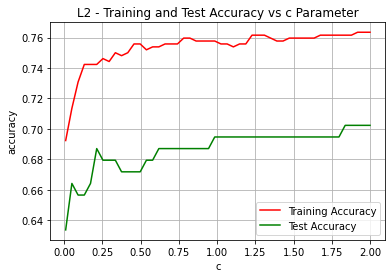

In [11]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

# c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
# c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train White Wines Data

In [12]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1060, 1060, 1060]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[6.6000e+00 2.2000e-01 2.8000e-01 1.2050e+01 5.8000e-02 2.5000e+01
  1.2500e+02 9.9856e-01 3.4500e+00 4.5000e-01 9.4000e+00]
 [7.1000e+00 1.8000e-01 3.9000e-01 1.4500e+01 5.1000e-02 4.8000e+01
  1.5600e+02 9.9947e-01 3.3500e+00 7.8000e-01 9.1000e+00]
 [7.7000e+00 3.5000e-01 4.6000e-01 1.1800e+01 8.8000e-02 6.1000e+01
  1.8300e+02 9.9786e-01 2.8600e+00 4.7000e-01 9.0000e+00]
 [6.9000e+00 3.2000e-01 1.3000e-01 7.8000e+00 4.2000e-02 1.1000e+01
  1.1700e+02 9.9600e-01 3.2300e+00 3.7000e-01 9.2000e+00]
 [6.2000e+00 3.8000e-01 1.8000e-01 7.4000e+00 9.5000e-02 2.8000e+01
  1.9500e+02 9.9773e-01 3.5300e+00 7.1000e-01 9.2000e+00]
 [9.0000e+00 4.3000e-01 3.0000e-01 1.5000e+00

Logistic - L1, C=0.01, Train Accuracy = 0.5636792452830188, Test Accuracy = 0.5723270440251572
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.5884433962264151, Test Accuracy = 0.559748427672956
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.5884433962264151, Test Accuracy = 0.5581761006289309
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.5888364779874213, Test Accuracy = 0.5566037735849056
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.5888364779874213, Test Accuracy = 0.5581761006289309
Best: Logistic - L1, Train Accuracy = 0.5636792452830188, C=0.01
Test Accuracy = 0.5723270440251572


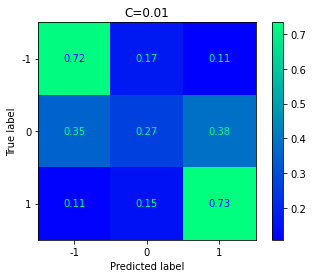

              precision    recall  f1-score   support

        -1.0       0.61      0.72      0.66       212
         0.0       0.46      0.27      0.34       214
         1.0       0.59      0.73      0.66       210
		 R2 Score: 0.021312428275481854



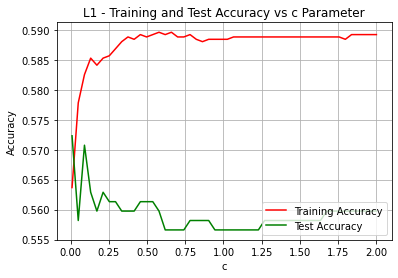

Logistic - L2, C=0.01, Train Accuracy = 0.5852987421383647, Test Accuracy = 0.5738993710691824
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.5880503144654088, Test Accuracy = 0.5566037735849056
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.5892295597484277, Test Accuracy = 0.5566037735849056
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.5884433962264151, Test Accuracy = 0.5566037735849056
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.5884433962264151, Test Accuracy = 0.5581761006289309
Best: Logistic - L2, Train Accuracy = 0.5852987421383647, C=0.01
Test Accuracy = 0.5738993710691824


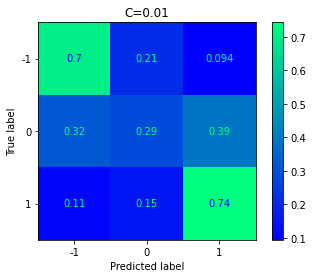

              precision    recall  f1-score   support

        -1.0       0.62      0.70      0.65       212
         0.0       0.45      0.29      0.35       214
         1.0       0.60      0.74      0.66       210
		 R2 Score: 0.05211857460095093



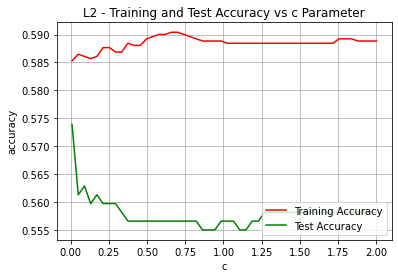

In [13]:
train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, C=0.01, Train Accuracy = 0.5758647798742138, Test Accuracy = 0.5754716981132075
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.6430817610062893, Test Accuracy = 0.60062893081761
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.6426886792452831, Test Accuracy = 0.5974842767295597
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.6415094339622641, Test Accuracy = 0.5959119496855346
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.6407232704402516, Test Accuracy = 0.5959119496855346
Best: Logistic - L1, Train Accuracy = 0.6198899371069182, C=0.05061224489795919
Test Accuracy = 0.6053459119496856


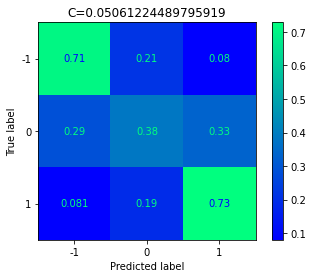

              precision    recall  f1-score   support

        -1.0       0.66      0.71      0.68       212
         0.0       0.49      0.38      0.43       214
         1.0       0.63      0.73      0.68       210
		 R2 Score: 0.16349464208533926



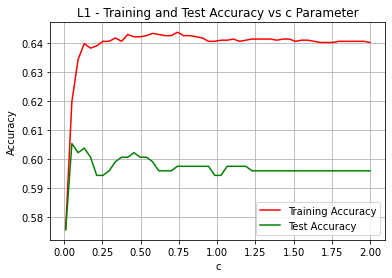

Logistic - L2, C=0.01, Train Accuracy = 0.6348270440251572, Test Accuracy = 0.5943396226415094
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.6462264150943396, Test Accuracy = 0.6022012578616353
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.6454402515723271, Test Accuracy = 0.60062893081761
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.6474056603773585, Test Accuracy = 0.6022012578616353
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.648191823899371, Test Accuracy = 0.6022012578616353
Best: Logistic - L2, Train Accuracy = 0.6454402515723271, C=0.2942857142857143
Test Accuracy = 0.6037735849056604


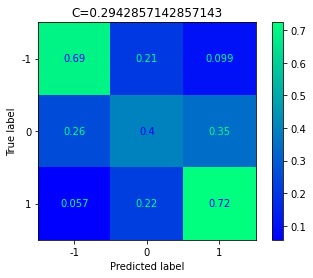

              precision    recall  f1-score   support

        -1.0       0.69      0.69      0.69       212
         0.0       0.49      0.40      0.44       214
         1.0       0.62      0.72      0.67       210
		 R2 Score: 0.16823404921233442



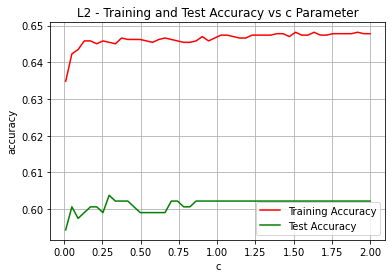

In [14]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train All Wines Data

In [15]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1277, 1277, 1277]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X[:10, :]:
[[7.7000e+00 3.9000e-01 3.4000e-01 1.0000e+01 5.6000e-02 3.5000e+01
  1.7800e+02 9.9740e-01 3.2600e+00 6.0000e-01 1.0200e+01]
 [7.3000e+00 3.0000e-01 7.4000e-01 1.3500e+01 3.9000e-02 4.6000e+01
  1.6500e+02 9.9820e-01 3.0200e+00 4.0000e-01 8.7000e+00]
 [7.5000e+00 4.2000e-01 3.1000e-01 1.6000e+00 8.0000e-02 1.5000e+01
  4.2000e+01 9.9780e-01 3.3100e+00 6.4000e-01 9.0000e+00]
 [8.3000e+00 6.0000e-01 2.5000e-01 2.2000e+00 1.1800e-01 9.0000e+00
  3.8000e+01 9.9616e-01 3.1500e+00 5.3000e-01 9.8000e+00]
 [9.7000e+00 1.4000e-01 5.9000e-01 1.5000e+00 4.9000e-02 2.3000e+01
  1.4200e+02 9.9580e-01 2.9800e+00 6.2000e-01 9.5000e+00]
 [7.4000e+00 2.7000e-01 2.6000e-01 1.1800e+01

Logistic - L1, C=0.01, Train Accuracy = 0.5682114882506527, Test Accuracy = 0.5723598435462842
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.5815926892950392, Test Accuracy = 0.5945241199478487
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.5825718015665796, Test Accuracy = 0.5893089960886571
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.5819190600522193, Test Accuracy = 0.5919165580182529
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.5819190600522193, Test Accuracy = 0.590612777053455
Best: Logistic - L1, Train Accuracy = 0.5845300261096605, C=0.17244897959183675
Test Accuracy = 0.5984354628422425


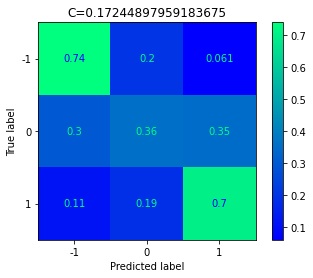

              precision    recall  f1-score   support

        -1.0       0.62      0.74      0.67       231
         0.0       0.48      0.36      0.41       253
         1.0       0.66      0.70      0.68       283
		 R2 Score: 0.12630320738428857



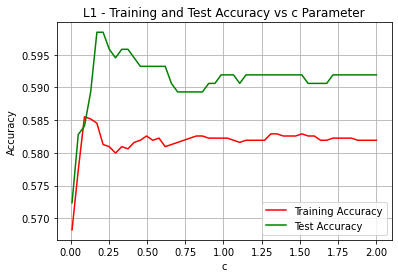

Logistic - L2, C=0.01, Train Accuracy = 0.589425587467363, Test Accuracy = 0.5945241199478487
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.5825718015665796, Test Accuracy = 0.5932203389830508
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.581266318537859, Test Accuracy = 0.5919165580182529
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.581266318537859, Test Accuracy = 0.5919165580182529
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.581266318537859, Test Accuracy = 0.590612777053455
Best: Logistic - L2, Train Accuracy = 0.581266318537859, C=0.09122448979591836
Test Accuracy = 0.5958279009126467


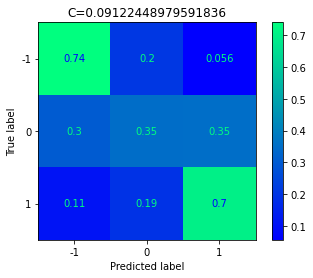

              precision    recall  f1-score   support

        -1.0       0.62      0.74      0.67       231
         0.0       0.47      0.35      0.40       253
         1.0       0.66      0.70      0.68       283
		 R2 Score: 0.13413905305797202



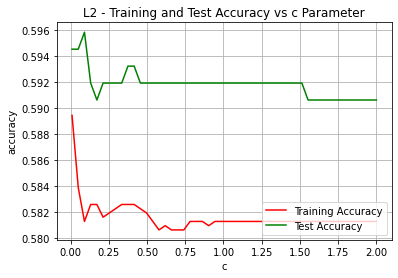

In [16]:
train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, C=0.01, Train Accuracy = 0.5701697127937336, Test Accuracy = 0.5840938722294654
Logistic - L1, C=0.41612244897959183, Train Accuracy = 0.6370757180156658, Test Accuracy = 0.6166883963494133
Logistic - L1, C=0.8222448979591837, Train Accuracy = 0.6377284595300261, Test Accuracy = 0.6153846153846154
Logistic - L1, C=1.2283673469387755, Train Accuracy = 0.6360966057441253, Test Accuracy = 0.6179921773142112
Logistic - L1, C=1.6344897959183673, Train Accuracy = 0.6360966057441253, Test Accuracy = 0.6140808344198174
Best: Logistic - L1, Train Accuracy = 0.6360966057441253, C=1.2689795918367348
Test Accuracy = 0.6192959582790091


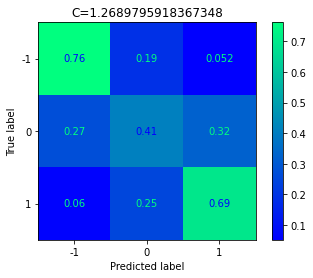

              precision    recall  f1-score   support

        -1.0       0.67      0.76      0.72       231
         0.0       0.48      0.41      0.44       253
         1.0       0.68      0.69      0.68       283
		 R2 Score: 0.25755362241848734



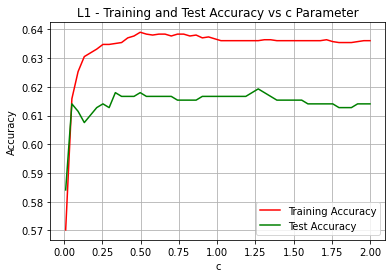

Logistic - L2, C=0.01, Train Accuracy = 0.6276109660574413, Test Accuracy = 0.6023468057366362
Logistic - L2, C=0.41612244897959183, Train Accuracy = 0.6413185378590078, Test Accuracy = 0.636245110821382
Logistic - L2, C=0.8222448979591837, Train Accuracy = 0.6413185378590078, Test Accuracy = 0.6336375488917861
Logistic - L2, C=1.2283673469387755, Train Accuracy = 0.6400130548302873, Test Accuracy = 0.6310299869621904
Logistic - L2, C=1.6344897959183673, Train Accuracy = 0.639686684073107, Test Accuracy = 0.6310299869621904
Best: Logistic - L2, Train Accuracy = 0.6419712793733682, C=0.37551020408163266
Test Accuracy = 0.636245110821382


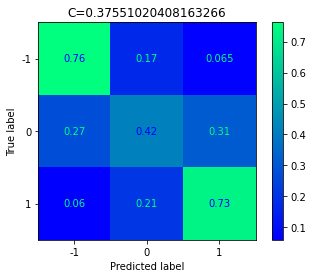

              precision    recall  f1-score   support

        -1.0       0.67      0.76      0.71       231
         0.0       0.51      0.42      0.46       253
         1.0       0.69      0.73      0.71       283
		 R2 Score: 0.2653894680921709



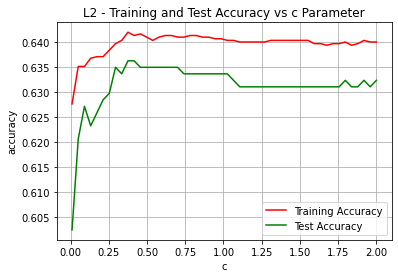

In [17]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)